# Group 20 - Predicting Heart Disease

### Introduction
An ever prevalent issue within an individual's health is the threat of a heart disease. Being affected by a heart disease would be dangerous to a person and could be fatal. We aim to learn how to detect factors within individuals who may potentially be affected by heart disease in hopes of avoiding it. Things such as age, cholesterol levels (Wu et al., 2015), and heart rate (Custodis et al., 2013) are often associated with an individual’s health and can often indicate the state of their health). 

#### With that in mind, we wish to ask “how can age, cholesterol, and resting heart rate help determine wheather somebody has a heart disease?”. 

The data that will be used to answer this question comes from the Cleveland Database, it contains 14 categories within an individual’s health and labels their heart disease diagnosis on a scale from 0 to 4, 0 being no presence of a heart disease and 1 to 4 being the severity.

#### Table Columns:
1. Age
2. Sex (1 = male, 0 = female)
3. cp (Chest Pain Type)
4. trestbps (Resting Blood Pressure in in mm Hg)
5. chol (serum cholestrol level in mg/dl)
6. fbs (fasting blood sugar, if greater than 120 mg/dl = 1, if less than 120 mg/dl = 0)
7. restecg (resting electrocardiographic results)
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment)
12. ca (number of major vessels (0-3) colored by flourosopy)
13. thal (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. num (heart disease severity, 0 = no heart disease, 1,2,3,4 = heart disease)


### 0. Loading Libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### 1. Loading and Wrangling the data
We first loaded our data from the web through a Github link in our repository. There were no column names, so we added them through the colnames() function. From there, we mutated num, which is whether our the patient has heart disease, to go from an integer to a factor. This is needed for the K-nn algorithm to function, since factor is a categorial data type. We also relabelled the num column to whether a patient has heart disease or not, instead of the serverity of the heart disease. We then selected the columns relevant to our project, which includes our predictors (age, trestbps, chol) and what we are trying to predict (num).

In [2]:
set.seed(20)

main_table <- read_csv("https://raw.githubusercontent.com/parthchheda2005/dsci-100-project/main/data/processed.cleveland.data")
x <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
colnames(main_table) <- x
heart_data <- main_table |>
              mutate(num = as_factor(num)) |>
              mutate(num = fct_recode(num, "negative" = "0" , "positive" = "1", "positive" = "2", "positive" = "3", "positive" = "4"))
#positive means heart disease and negative means no heart disease

heart_data <- heart_data |>
              select(age, trestbps, chol, num)
main_table
heart_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,trestbps,chol,num
<dbl>,<dbl>,<dbl>,<fct>
67,160,286,positive
67,120,229,positive
37,130,250,negative
⋮,⋮,⋮,⋮
57,130,131,positive
57,130,236,positive
38,138,175,negative


### 2. Splitting data and generating summary statistics
Data needs to be split to avoid overfitting our model to the data. We used the initial_split() function to do so, splitting it with 75% of our data to training, while 25% of our data to testing. This leaves a lot of data to train our model while also leaving enough for testing.  We also want to produce summary statistics on our training data, to gather the split between patients with heart disease and patients without heart disease. 
We also want to see the averages, maximums and minimums of our predictors so that we can develop an intuition of what people are likely to have heart disease.  

In [3]:
set.seed(20)

heart_split <- initial_split(heart_data, prop = 0.75, strata = num)  
heart_training <- training(heart_split)   
heart_test  <- testing(heart_split)

rows <- heart_training |> 
        group_by(num) |>
        summarize(sample = n())
rows

mean <- heart_training |> 
        group_by(num) |>
        summarize(average_age = mean(age), average_trestbps = mean(trestbps), average_chol = mean(chol))
mean

max <- heart_training |> 
        group_by(num) |>
        summarize(max_age = max(age), max_trestbps = max(trestbps), max_chol = max(chol))

max

min <- heart_training |> 
        group_by(num) |>
        summarize(min_age = min(age), min_trestbps = min(trestbps), min_chol = min(chol))

min

num,sample
<fct>,<int>
negative,122
positive,104


num,average_age,average_trestbps,average_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,52.72951,129.5410,243.6639
positive,56.67308,134.4904,251.4808


num,max_age,max_trestbps,max_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,76,180,564
positive,77,192,409


num,min_age,min_trestbps,min_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,34,94,126
positive,35,108,131


From the summary statistics, we can see a roughly even split between negative and positive diagnoses. This is good for our training, since the model is well informed on the characteristics of both positive and negative data. In general, from the averages, maximums, and minimums, higher age, cholesterol levels, and resting heart rates is indicative of heart disease. This aligns with our initial understanding, since we thought that higher cholesterol, heart rates, and age is indicative of heart disease.

###3 Making the three visualization
We then are going to investigating the relationship in different variables. So we use the geom_point function to visualization our data as a scatter plot. Here are the three scatter plot, which respectively showing the relationship between the resting heart rate vs cholestrol levels, age vs cholestrol klevels and age vs resting heart age. From the visualiztion, we notice that the higher resting heart rate, age or cholestrol is the more likely the persomn to have a heat disease is

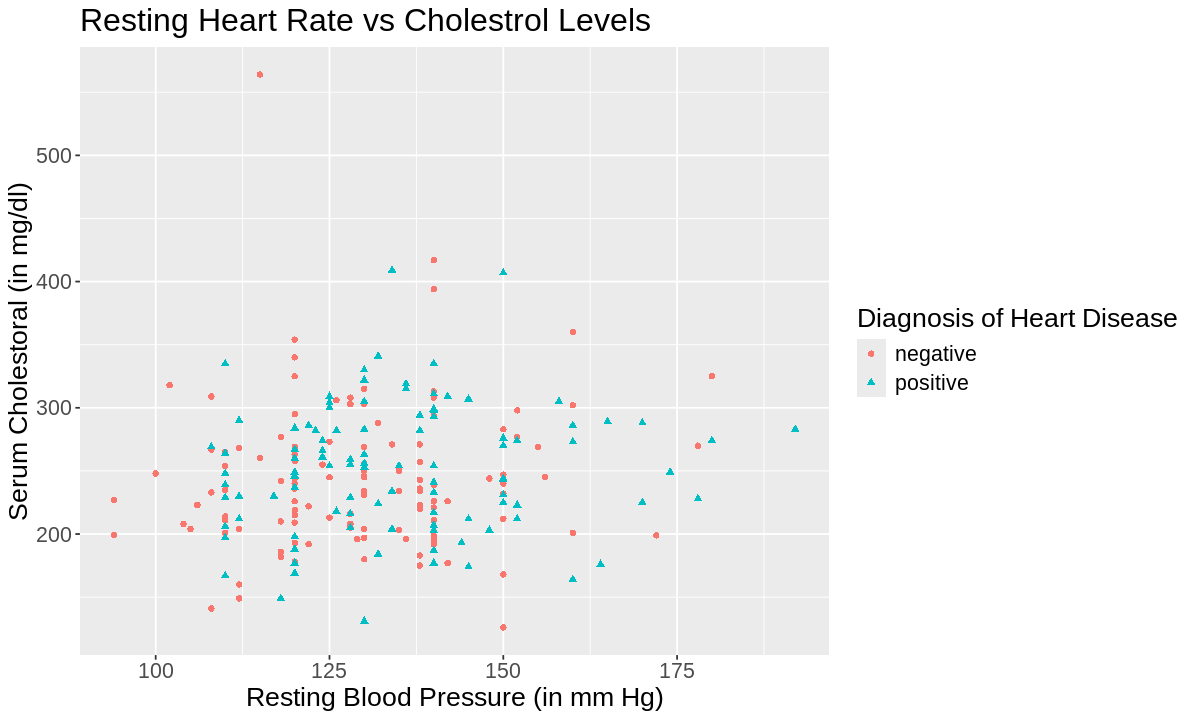

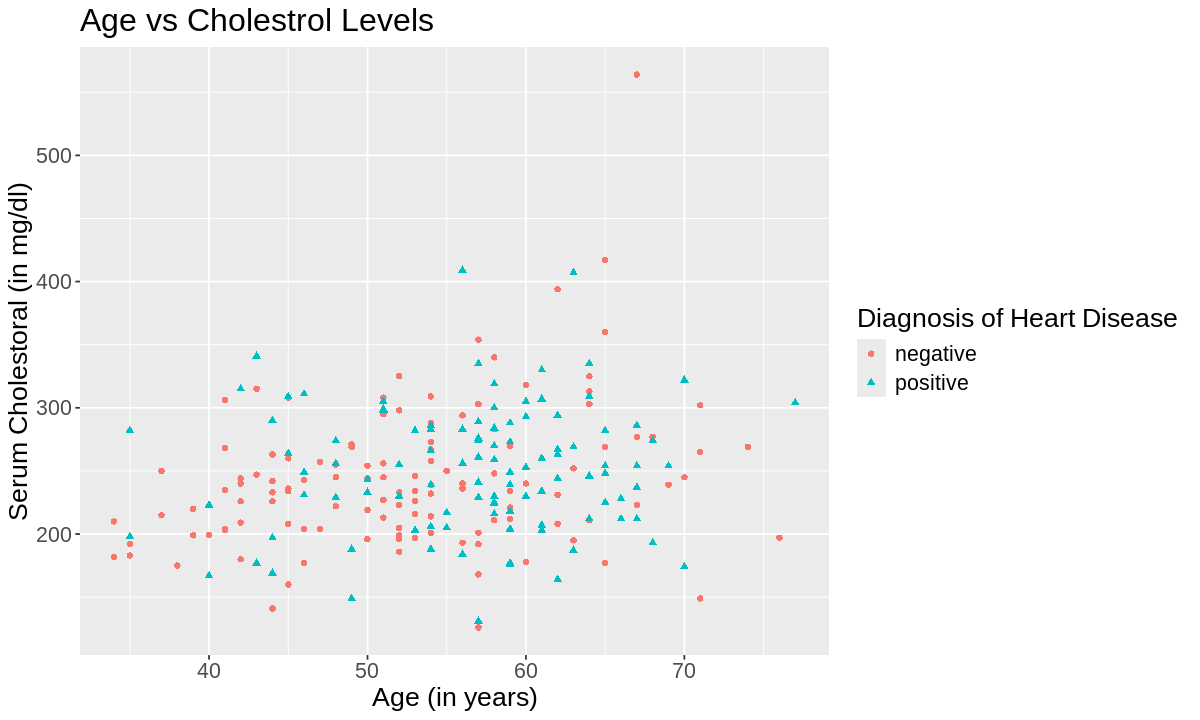

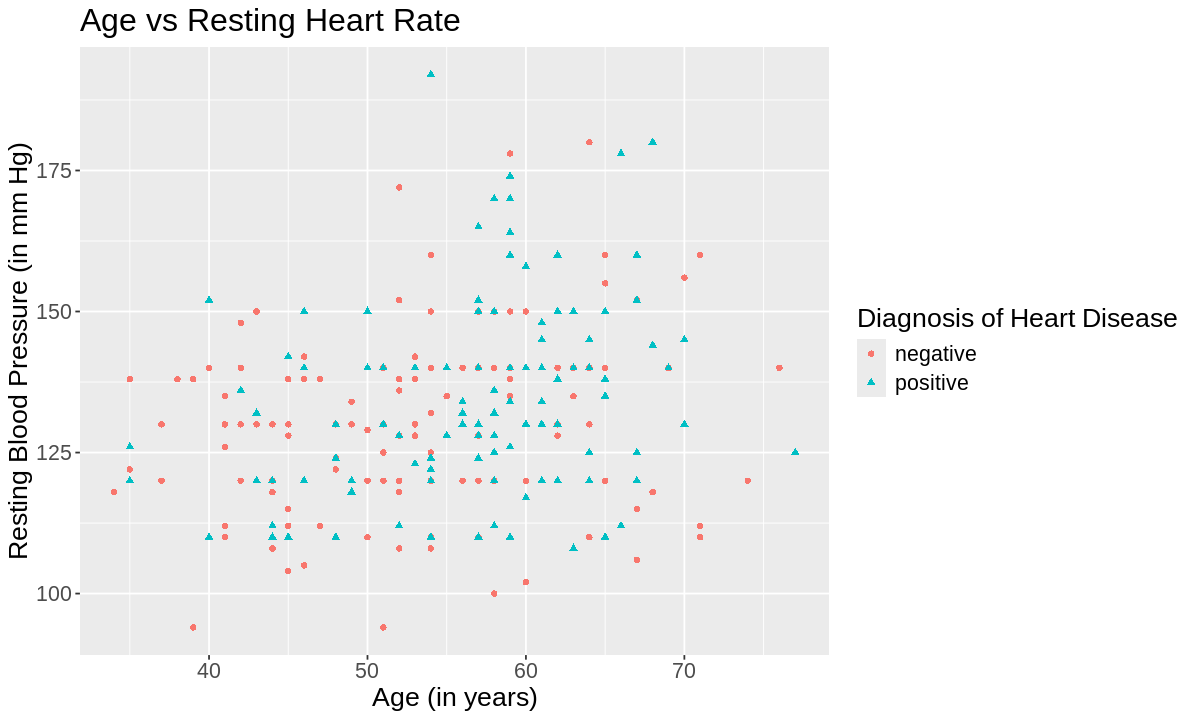

In [4]:
set.seed(20)

options(repr.plot.width = 10, repr.plot.height = 6)
plot_1 <- ggplot(heart_training, aes(x = trestbps, y = chol, color = num, shape = num)) +
          geom_point() +
          labs(x = "Resting Blood Pressure (in mm Hg)", 
               y = "Serum Cholestoral (in mg/dl)",
               color = "Diagnosis of Heart Disease", 
               shape = "Diagnosis of Heart Disease") +
          theme(text = element_text(size = 16)) +
          ggtitle("Resting Heart Rate vs Cholestrol Levels")
plot_1

plot_2 <- ggplot(heart_training, aes(x = age, y = chol, color = num, shape = num)) +
          geom_point() +
          labs(x = "Age (in years)", 
               y = "Serum Cholestoral (in mg/dl)",
               color = "Diagnosis of Heart Disease",
               shape = "Diagnosis of Heart Disease") +
          theme(text = element_text(size = 16)) +
          ggtitle("Age vs Cholestrol Levels")
plot_2

plot_3 <- ggplot(heart_training, aes(x = age, y = trestbps, color = num, shape = num)) +
          geom_point() +
          labs(x = "Age (in years)", 
               y = "Resting Blood Pressure (in mm Hg)",
               color = "Diagnosis of Heart Disease",
               shape = "Diagnosis of Heart Disease") +
          theme(text = element_text(size = 16)) +
          ggtitle("Age vs Resting Heart Rate")
plot_3


### Methods
To clean the data, we needed a way to convert the num row which shows the severity of the heart disease to simply showing whether a patient has heart disease or not. To do so, we used the mutate function to replace all the integers in num with “positive” if heart disease is found and “negative” if heart disease is not found. We also only selected the columns containing the variables we want to use for our analysis.

We want to answer our question through the k-nearest neighbour algorithm. We plan to only use the columns num, which is what we will be determining, and chol, trestbps, and age as our predictors. From our summary tables and visualisations, we notice that the higher resting heart rate, age or cholesterol is the more likely the person is to have a heart disease is. 

From there, we want to scale and centre our data. We then want to create our training data and testing data, using the initial_split() method, by splitting it 75% and 25% respectively. We will do stratifying by num, which contains data on whether heart disease is there or not there. For the analysis, we only used training data. The training data will then be used to create a k-nearest neighbour model. We will then use cross-validation to determine the effectiveness of our model and test it against our testing data.

We plan to visualise our results through a line plot comparing the number of neighbours used compared to the accuracy of predictions. This would help us decide on the ideal number of neighbours to predict whether someone has heart disease or not. 


### Expected Outcome and Significance:
If the patient is older, we expect a higher chance of heart disease to be found. Additionally, higher cholesterol should mean that there is a higher chance of heart disease being found. We also believe that high blood pressure should result in heart disease. 

Having a classification method to determine heart disease should help doctors diagnose their patient with less error, and more efficiency. 

Based on our findings, further research can be conducted on: 
What are effective ways to lower cholesterol levels in older individuals?
Out of the factors present in someone’s health, what is the most important factor to consider when treating a patient with heart disease?

In [5]:
# Getting K value

set.seed(20)

# Making the recipe for heart disease
heart_recipe <- recipe(num ~ age + trestbps + chol, data = heart_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

# Making the knn tuning model specification
heart_tune <- nearest_neighbor(weight = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Making the cross-validation values
vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

# Making the 5-fold cross validation
heart_vfold <- vfold_cv(heart_training, v = 10, strata = num)


In [6]:
# Putting everything in the workflow
set.seed(20)


workflow <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(heart_tune) |>
            tune_grid(resamples = heart_vfold, grid = vals) |> 
            collect_metrics()

# Getting the accuracy of each k value
accuracy <- workflow |> filter(.metric == "accuracy") |> arrange(desc(mean))

head(accuracy)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
81,accuracy,binary,0.6430995,10,0.03793227,Preprocessor1_Model081
82,accuracy,binary,0.6430995,10,0.03793227,Preprocessor1_Model082
75,accuracy,binary,0.6381752,10,0.03349118,Preprocessor1_Model075
76,accuracy,binary,0.6381752,10,0.03349118,Preprocessor1_Model076
79,accuracy,binary,0.6381752,10,0.03929541,Preprocessor1_Model079
80,accuracy,binary,0.6381752,10,0.03929541,Preprocessor1_Model080


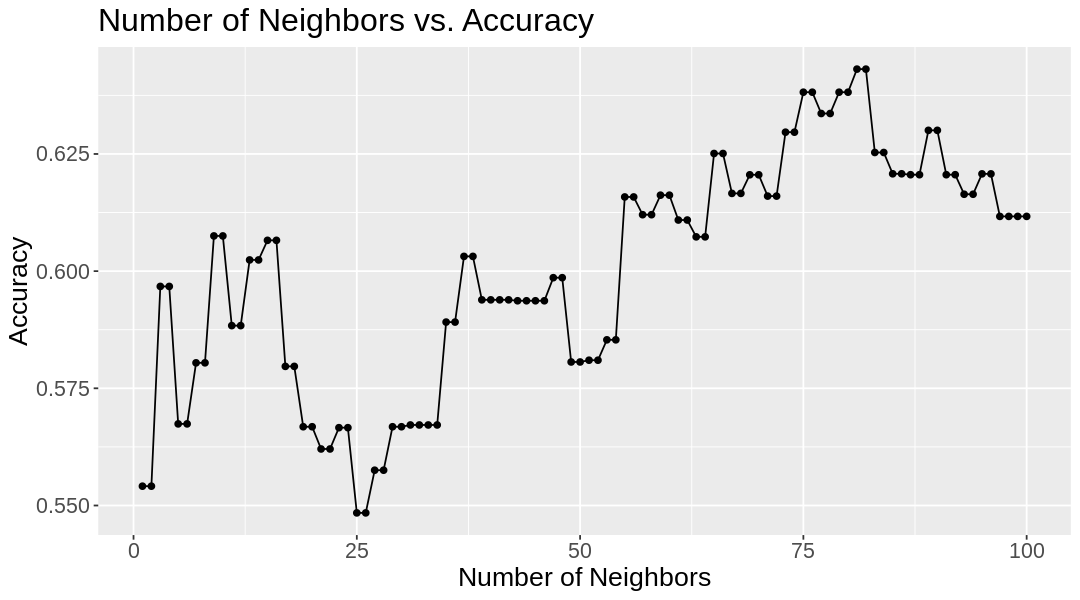

In [7]:
# Plotting the accuracy for each neighbour and their accuracy
options(repr.plot.width = 9, repr.plot.height = 5)

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) + 
            geom_point() +
            geom_line() +
            labs(x = "Number of Neighbors", y = "Accuracy") + 
            ggtitle("Number of Neighbors vs. Accuracy") +
            theme(text = element_text(size = 16))
            

cross_val_plot

In [8]:
set.seed(20)

#Firstly, We know that K=81 provides the optimal estimated accuracy. 
#Secondly, if we increase or decrease K near K=81, estimated accuracy changed a small amount.
#And finally, K=81 does not create a prohibitively expensive computational cost of training. 
#In conclusion, we would select K=81 for the classifier.

#build up our model with the best value for K=81
heart_best_spec <- nearest_neighbor(weight = "rectangular", neighbors = 81) |>
                   set_engine("kknn") |>
                   set_mode("classification")

#pass the model and training data set to fit function
heart_best_fit <- workflow() |>
                  add_recipe(heart_recipe) |>
                  add_model(heart_best_spec) |>
                  fit(heart_training)


#use the bind_cols function to add the column of predictions to the original test data
heart_predictions <- predict(heart_best_fit, heart_test) |>
                     bind_cols(heart_test)
heart_predictions

#report the accuracy of this prediction
heart_acc <- heart_predictions |>
             metrics(truth = num, estimate = .pred_class) |>
             filter(.metric == "accuracy")
heart_acc

#
heart_conf_mat <- heart_predictions |>
                  conf_mat(truth = num, estimate = .pred_class) 
             
heart_conf_mat

#
heart_recall <- heart_predictions |> 
          recall(truth = num, estimate = .pred_class)
heart_recall

#
heart_precision <- heart_predictions |> 
             precision(truth = num, estimate = .pred_class)
heart_precision


.pred_class,age,trestbps,chol,num
<fct>,<dbl>,<dbl>,<dbl>,<fct>
positive,67,120,229,positive
positive,62,140,268,positive
positive,63,130,254,positive
⋮,⋮,⋮,⋮,⋮
positive,63,124,197,positive
negative,41,120,157,negative
positive,57,130,236,positive


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6710526


          Truth
Prediction negative positive
  negative       27       11
  positive       14       24

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6585366


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7105263
